In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


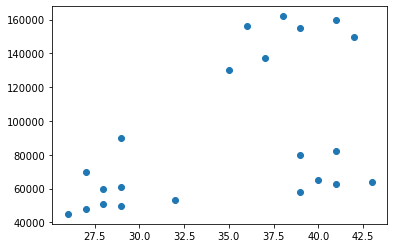

In [3]:
plt.scatter(df.Age,df.Income)

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predict = km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


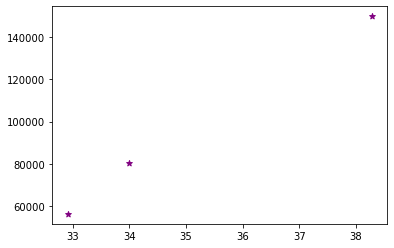

In [7]:
k_len = km.cluster_centers_
n = len(k_len)
for i in range(n):
    plt.scatter(k_len[i][0],k_len[i][1],color='purple',marker='*',label='centeroid')

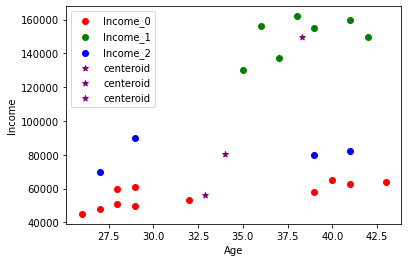

In [8]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income'],color='red',label='Income_0')
plt.scatter(df1.Age,df1['Income'],color='green',label='Income_1')
plt.scatter(df2.Age,df2['Income'],color='blue',label='Income_2')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
for i in range(n):
    plt.scatter(k_len[i][0],k_len[i][1],color='purple',marker='*',label='centeroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [9]:
#but we can see that clustering is not parfect
#so we need to fit and transform all columns data [start from the last]

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


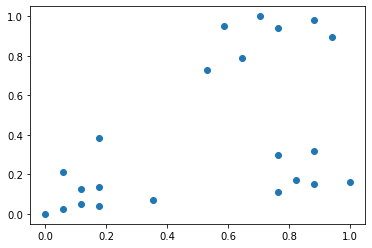

In [11]:
plt.scatter(df.Age,df.Income)

In [12]:
y_predict = km.fit_predict(df[['Age','Income']]) #Compute cluster centers and predict cluster index for each sample.
df['cluster'] = y_predict
df.head()
# y_predict

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


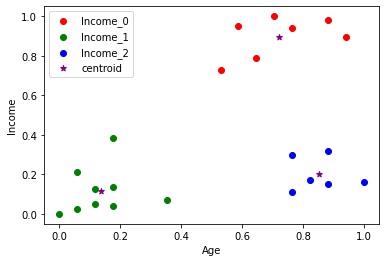

In [13]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0['Income'],color='red',label='Income_0')
plt.scatter(df1.Age,df1['Income'],color='green',label='Income_1')
plt.scatter(df2.Age,df2['Income'],color='blue',label='Income_2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#[:,0]-> All value of 0th columns && [:,1]-> All value of 1st columns of Array(km.cluster_centers_)

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend() #for showing label name in graph

In [14]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    kk = KMeans(n_clusters=k)
    kk.fit(df[['Age','Income']])#Compute k-means clustering.
    sse.append(kk.inertia_)#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

C:\Users\khanm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


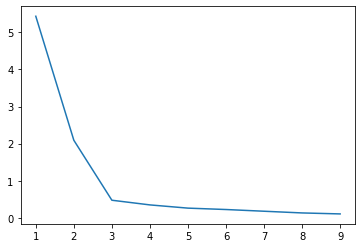

In [15]:
plt.plot(k_rng,sse)